## 참고 문서

https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

## 데이터 전처리

In [1]:
import tensorflow as tf
import tensorflow.keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
import cv2

In [2]:
img_dir = '/Users/User/303/KT_32px/food_competition_KT_set1/train/'
categoris = os.listdir(img_dir)
nb_categoris = len(categoris)

In [3]:
data = []
labels = []
for i in range(nb_categoris) :
    a = glob.glob(img_dir+'/'+categoris[i]+'/*.jpg')
    for j in a :
        image=tensorflow.keras.preprocessing.image.load_img(j, color_mode='rgb')
        image=np.array(image)
        data.append(image)
        labels.append(i)

In [4]:
inputs=np.array(data)
inputs=inputs/255.0
inputs.shape

(10000, 32, 32, 3)

In [5]:
labels = np.array(labels)
targets=labels.reshape(-1,1)
targets.shape

(10000, 1)

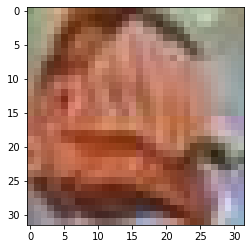

In [6]:
plt.imshow(inputs[9999])
#야미

In [42]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Activation,Flatten, Conv2D,MaxPooling2D,ReLU,LeakyReLU,ELU,BatchNormalization,Dropout,GlobalAveragePooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam,SGD
from keras.regularizers import l2
from sklearn.model_selection import KFold
import numpy as np
from keras import regularizers
# Model configuration
batch_size = 32
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 50
no_epochs = 50
optimizer = Adam()
verbosity = 1
num_folds = 5


In [9]:
targets.shape

(10000, 1)

In [10]:
#np.save('targets.npy',targets)

In [11]:
inputs.shape

(10000, 32, 32, 3)

In [12]:
act=LeakyReLU(0.01)
#act=ReLU()
#act=ELU()

In [13]:
# def model_fn():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (128, 128, 3)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     #model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(32, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(32, kernel_size = 5, padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.4))

#     model.add(Conv2D(64, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(64, kernel_size = 5,padding='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.4))

#     model.add(Conv2D(32, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(32, kernel_size = 3, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(32, kernel_size = 3, activation='relu'))
#     model.add(Conv2D(16, kernel_size = 3, activation='relu'))
#     #model.add(Conv2D(4, kernel_size = 3, activation='relu'))
#     model.add(Flatten())
#     model.add(Dropout(0.4))
#     model.add(Dense(128,activation='relu'))
#     model.add(Dense(50, activation='softmax'))
#     return model

In [14]:
# # 40~50퍼
# def model_fn():
#     model = Sequential()

#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(50, activation='softmax')) # 2 because we have cat and dog classes
#     return model

In [15]:
# #제일 잘나옴
# def model_fn():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation=act, input_shape=(32,32,3)))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation=act))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, kernel_size=(3, 3), padding='same',activation=act))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation=act))
#     model.add(Dense(128, activation=act))
#     model.add(Dense(no_classes, activation='softmax'))
#     return model

In [16]:
# # 55.8399999%
# # Model configuration
# # batch_size = 32
# # img_width, img_height, img_num_channels = 32, 32, 3
# # loss_function = sparse_categorical_crossentropy
# # no_classes = 50
# # no_epochs = 50
# # optimizer = Adam()
# # verbosity = 1
# # num_folds = 5
# def model_fn():
#     model = Sequential()

#     # Convolutional Layer
#     model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=32, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     # Pooling layer
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     # Dropout layers
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters=64, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=64, kernel_size=(3, 3),activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters=128, kernel_size=(3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=128, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Flatten())
#     # model.add(Dropout(0.2))
#     model.add(Dense(128, activation=act))
#     model.add(Dropout(0.25))
#     model.add(Dense(50, activation='softmax'))
#     return model

In [33]:

def model_fn():
    
    model = Sequential()
    weight_decay = 0.0005
    weight_decay = weight_decay

    model.add(Conv2D(64, (3, 3), padding='same',
                     input_shape=(32,32,3),kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(no_classes))
    model.add(Activation('softmax'))
    return model

In [101]:
# # Model configuration
# # batch_size = 32
# # img_width, img_height, img_num_channels = 32, 32, 3
# # loss_function = sparse_categorical_crossentropy
# # no_classes = 50
# # no_epochs = 50
# # optimizer = Adam()
# # verbosity = 1
# # num_folds = 5
# def model_fn():
#     model = Sequential()

#     # Convolutional Layer
#     model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=32, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     # Pooling layer
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     # Dropout layers
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters=64, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=64, kernel_size=(3, 3),activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))

#     model.add(Conv2D(filters=128, kernel_size=(3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=128, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(filters=256, kernel_size=(3, 3), activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(Conv2D(filters=256, kernel_size=(3, 3),  activation=act, padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))


#     model.add(Flatten())
#     # model.add(Dropout(0.2))
#     model.add(Dense(128, activation=act))
#     model.add(Dropout(0.25))
#     model.add(Dense(50, activation='softmax'))
#     return model

In [34]:
model=model_fn()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 64)        0         
                                                      

                                                                 
 dropout_8 (Dropout)         (None, 1, 1, 512)         0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 activation_13 (Activation)  (None, 512)               0         
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                25650     
          

### Loss : sparse_categorical_crossentropy 사용

In [103]:
# sparse_categorical_crossentropy -> target이 int인경우 ->얘가 속도 더 빠르대
# categorical_crossentropy -> target이 ont-hot encoding된경우 사용

In [49]:
batch_size = 128
maxepoches = 200
learning_rate = 0.1
lr_decay = 1e-6
lr_drop = 20

In [40]:
import keras
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

In [50]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

# K-fold Cross Validation model evaluation
fold_no = 1

# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
for train, test in kfold.split(inputs, targets):
    #print(train)
    #print(test)
    model=model_fn()
    
    # Compile the model
    sgd = SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
    
    model.compile(loss=sparse_categorical_crossentropy,
                optimizer=sgd,
                metrics=['accuracy'])

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
                  batch_size=batch_size,
                  epochs=maxepoches,
                  validation_data=(inputs[test], targets[test]),
                  callbacks=[reduce_lr],
                  verbose=verbosity)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=1)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
63/63 [==============================] - 4s 31ms/step - loss: 24.5725 - accuracy: 0.0428 - val_loss: 26525.6973 - val_accuracy: 0.0260 - lr: 0.1000
Epoch 2/200
63/63 [==============================] - 2s 25ms/step - loss: 26.3883 - accuracy: 0.0855 - val_loss: 318.3046 - val_accuracy: 0.0395 - lr: 0.1000
Epoch 3/200
63/63 [==============================] - 2s 25ms/step - loss: 23.3907 - accuracy: 0.1079 - val_loss: 22.2381 - val_accuracy: 0.1155 - lr: 0.1000
Epoch 4/200
63/63 [==============================] - 2s 25ms/step - loss: 21.0083 - accuracy: 0.1285 - val_loss: 20.8792 - val_accuracy: 0.0305 - lr: 0.1000
Epoch 5/200
63/63 [==============================] - 2s 25ms/step - loss: 18.7346 - accuracy: 0.1450 - val_loss: 19.5192 - val_accuracy: 0.0210 - lr: 0.1000
Epoch 6/200
63/63 [==============================] - 2s 25ms/step - loss: 16.8009 - accuracy: 0.1614 - val_loss: 1

Epoch 53/200
63/63 [==============================] - 2s 26ms/step - loss: 1.9543 - accuracy: 0.6666 - val_loss: 3.0873 - val_accuracy: 0.4580 - lr: 0.0250
Epoch 54/200
63/63 [==============================] - 2s 26ms/step - loss: 1.9316 - accuracy: 0.6733 - val_loss: 3.2394 - val_accuracy: 0.4310 - lr: 0.0250
Epoch 55/200
63/63 [==============================] - 2s 26ms/step - loss: 1.9310 - accuracy: 0.6704 - val_loss: 3.3275 - val_accuracy: 0.4305 - lr: 0.0250
Epoch 56/200
63/63 [==============================] - 2s 26ms/step - loss: 1.9155 - accuracy: 0.6674 - val_loss: 2.9416 - val_accuracy: 0.4780 - lr: 0.0250
Epoch 57/200
63/63 [==============================] - 2s 26ms/step - loss: 1.9101 - accuracy: 0.6727 - val_loss: 3.1302 - val_accuracy: 0.4505 - lr: 0.0250
Epoch 58/200
63/63 [==============================] - 2s 26ms/step - loss: 1.8350 - accuracy: 0.6975 - val_loss: 2.9316 - val_accuracy: 0.4810 - lr: 0.0250
Epoch 59/200
63/63 [==============================] - 2s 26ms/st

Epoch 157/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6843 - accuracy: 0.9875 - val_loss: 3.3150 - val_accuracy: 0.5665 - lr: 7.8125e-04
Epoch 158/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6859 - accuracy: 0.9879 - val_loss: 3.3154 - val_accuracy: 0.5725 - lr: 7.8125e-04
Epoch 159/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6846 - accuracy: 0.9861 - val_loss: 3.3136 - val_accuracy: 0.5780 - lr: 7.8125e-04
Epoch 160/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6823 - accuracy: 0.9889 - val_loss: 3.2909 - val_accuracy: 0.5790 - lr: 7.8125e-04
Epoch 161/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6883 - accuracy: 0.9856 - val_loss: 3.2968 - val_accuracy: 0.5730 - lr: 3.9063e-04
Epoch 162/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6865 - accuracy: 0.9862 - val_loss: 3.2797 - val_accuracy: 0.5710 - lr: 3.9063e-04
Epoch 163/200
63/63 [=============

63/63 [==============================] - 2s 26ms/step - loss: 1.8704 - accuracy: 0.6931 - val_loss: 3.1303 - val_accuracy: 0.4515 - lr: 0.0250
Epoch 59/200
63/63 [==============================] - 2s 26ms/step - loss: 1.8623 - accuracy: 0.6905 - val_loss: 3.6650 - val_accuracy: 0.3930 - lr: 0.0250
Epoch 60/200
63/63 [==============================] - 2s 26ms/step - loss: 1.8301 - accuracy: 0.7041 - val_loss: 3.2321 - val_accuracy: 0.4560 - lr: 0.0250
Epoch 61/200
63/63 [==============================] - 2s 26ms/step - loss: 1.7244 - accuracy: 0.7364 - val_loss: 2.9302 - val_accuracy: 0.4965 - lr: 0.0125
Epoch 62/200
63/63 [==============================] - 2s 26ms/step - loss: 1.5815 - accuracy: 0.7754 - val_loss: 3.0127 - val_accuracy: 0.4880 - lr: 0.0125
Epoch 63/200
63/63 [==============================] - 2s 26ms/step - loss: 1.5531 - accuracy: 0.7763 - val_loss: 3.1525 - val_accuracy: 0.4775 - lr: 0.0125
Epoch 64/200
63/63 [==============================] - 2s 26ms/step - loss: 1.

Epoch 162/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6959 - accuracy: 0.9874 - val_loss: 3.3947 - val_accuracy: 0.5685 - lr: 3.9063e-04
Epoch 163/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6942 - accuracy: 0.9883 - val_loss: 3.3974 - val_accuracy: 0.5645 - lr: 3.9063e-04
Epoch 164/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6929 - accuracy: 0.9895 - val_loss: 3.3997 - val_accuracy: 0.5665 - lr: 3.9063e-04
Epoch 165/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6902 - accuracy: 0.9900 - val_loss: 3.3781 - val_accuracy: 0.5655 - lr: 3.9063e-04
Epoch 166/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6854 - accuracy: 0.9915 - val_loss: 3.3872 - val_accuracy: 0.5640 - lr: 3.9063e-04
Epoch 167/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6972 - accuracy: 0.9891 - val_loss: 3.3743 - val_accuracy: 0.5675 - lr: 3.9063e-04
Epoch 168/200
63/63 [=============

63/63 [==============================] - 2s 27ms/step - loss: 1.4857 - accuracy: 0.8061 - val_loss: 3.2064 - val_accuracy: 0.4660 - lr: 0.0125
Epoch 64/200
63/63 [==============================] - 2s 26ms/step - loss: 1.4538 - accuracy: 0.8130 - val_loss: 3.1265 - val_accuracy: 0.4885 - lr: 0.0125
Epoch 65/200
63/63 [==============================] - 2s 26ms/step - loss: 1.4239 - accuracy: 0.8204 - val_loss: 3.0740 - val_accuracy: 0.5100 - lr: 0.0125
Epoch 66/200
63/63 [==============================] - 2s 26ms/step - loss: 1.4308 - accuracy: 0.8179 - val_loss: 3.1884 - val_accuracy: 0.4745 - lr: 0.0125
Epoch 67/200
63/63 [==============================] - 2s 26ms/step - loss: 1.3896 - accuracy: 0.8305 - val_loss: 3.0862 - val_accuracy: 0.5100 - lr: 0.0125
Epoch 68/200
63/63 [==============================] - 2s 26ms/step - loss: 1.3701 - accuracy: 0.8322 - val_loss: 3.0753 - val_accuracy: 0.5275 - lr: 0.0125
Epoch 69/200
63/63 [==============================] - 2s 26ms/step - loss: 1.

Epoch 167/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6908 - accuracy: 0.9894 - val_loss: 3.2865 - val_accuracy: 0.5910 - lr: 3.9063e-04
Epoch 168/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6902 - accuracy: 0.9895 - val_loss: 3.2928 - val_accuracy: 0.5905 - lr: 3.9063e-04
Epoch 169/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6891 - accuracy: 0.9906 - val_loss: 3.2794 - val_accuracy: 0.5945 - lr: 3.9063e-04
Epoch 170/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6848 - accuracy: 0.9914 - val_loss: 3.2819 - val_accuracy: 0.5935 - lr: 3.9063e-04
Epoch 171/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6843 - accuracy: 0.9911 - val_loss: 3.2687 - val_accuracy: 0.5960 - lr: 3.9063e-04
Epoch 172/200
63/63 [==============================] - 2s 26ms/step - loss: 0.6854 - accuracy: 0.9904 - val_loss: 3.2754 - val_accuracy: 0.5930 - lr: 3.9063e-04
Epoch 173/200
63/63 [=============

Epoch 17/200
63/63 [==============================] - 2s 26ms/step - loss: 6.2728 - accuracy: 0.2598 - val_loss: 7.4743 - val_accuracy: 0.0805 - lr: 0.1000
Epoch 18/200
63/63 [==============================] - 2s 26ms/step - loss: 5.8233 - accuracy: 0.2657 - val_loss: 8.2473 - val_accuracy: 0.0590 - lr: 0.1000
Epoch 19/200
63/63 [==============================] - 2s 26ms/step - loss: 5.4287 - accuracy: 0.2858 - val_loss: 6.9690 - val_accuracy: 0.0545 - lr: 0.1000
Epoch 20/200
63/63 [==============================] - 2s 26ms/step - loss: 5.0857 - accuracy: 0.2949 - val_loss: 6.2059 - val_accuracy: 0.0930 - lr: 0.1000
Epoch 21/200
63/63 [==============================] - 2s 26ms/step - loss: 4.7827 - accuracy: 0.3085 - val_loss: 6.0947 - val_accuracy: 0.0915 - lr: 0.0500
Epoch 22/200
63/63 [==============================] - 2s 26ms/step - loss: 4.5727 - accuracy: 0.3304 - val_loss: 5.8639 - val_accuracy: 0.1215 - lr: 0.0500
Epoch 23/200
63/63 [==============================] - 2s 26ms/st

63/63 [==============================] - 2s 26ms/step - loss: 0.7453 - accuracy: 0.9780 - val_loss: 3.3359 - val_accuracy: 0.5525 - lr: 0.0016
Epoch 122/200
63/63 [==============================] - 2s 26ms/step - loss: 0.7275 - accuracy: 0.9824 - val_loss: 3.2994 - val_accuracy: 0.5640 - lr: 0.0016
Epoch 123/200
63/63 [==============================] - 2s 26ms/step - loss: 0.7350 - accuracy: 0.9800 - val_loss: 3.2719 - val_accuracy: 0.5640 - lr: 0.0016
Epoch 124/200
63/63 [==============================] - 2s 26ms/step - loss: 0.7244 - accuracy: 0.9833 - val_loss: 3.2863 - val_accuracy: 0.5615 - lr: 0.0016
Epoch 125/200
63/63 [==============================] - 2s 26ms/step - loss: 0.7245 - accuracy: 0.9812 - val_loss: 3.2843 - val_accuracy: 0.5630 - lr: 0.0016
Epoch 126/200
63/63 [==============================] - 2s 26ms/step - loss: 0.7289 - accuracy: 0.9780 - val_loss: 3.2990 - val_accuracy: 0.5580 - lr: 0.0016
Epoch 127/200
63/63 [==============================] - 2s 26ms/step - lo

Epoch 22/200
63/63 [==============================] - 2s 26ms/step - loss: 4.7753 - accuracy: 0.3406 - val_loss: 6.1282 - val_accuracy: 0.1405 - lr: 0.0500
Epoch 23/200
63/63 [==============================] - 2s 26ms/step - loss: 4.5905 - accuracy: 0.3531 - val_loss: 5.3370 - val_accuracy: 0.1875 - lr: 0.0500
Epoch 24/200
63/63 [==============================] - 2s 27ms/step - loss: 4.4269 - accuracy: 0.3645 - val_loss: 5.1977 - val_accuracy: 0.2200 - lr: 0.0500
Epoch 25/200
63/63 [==============================] - 2s 26ms/step - loss: 4.2749 - accuracy: 0.3715 - val_loss: 6.1902 - val_accuracy: 0.1240 - lr: 0.0500
Epoch 26/200
63/63 [==============================] - 2s 27ms/step - loss: 4.1509 - accuracy: 0.3701 - val_loss: 4.9220 - val_accuracy: 0.2240 - lr: 0.0500
Epoch 27/200
63/63 [==============================] - 2s 27ms/step - loss: 4.0282 - accuracy: 0.3798 - val_loss: 5.1439 - val_accuracy: 0.1955 - lr: 0.0500
Epoch 28/200
63/63 [==============================] - 2s 27ms/st

63/63 [==============================] - 2s 27ms/step - loss: 0.7670 - accuracy: 0.9794 - val_loss: 3.2506 - val_accuracy: 0.5670 - lr: 0.0016
Epoch 127/200
63/63 [==============================] - 2s 27ms/step - loss: 0.7698 - accuracy: 0.9787 - val_loss: 3.2429 - val_accuracy: 0.5680 - lr: 0.0016
Epoch 128/200
63/63 [==============================] - 2s 26ms/step - loss: 0.7662 - accuracy: 0.9799 - val_loss: 3.2400 - val_accuracy: 0.5710 - lr: 0.0016
Epoch 129/200
63/63 [==============================] - 2s 26ms/step - loss: 0.7708 - accuracy: 0.9775 - val_loss: 3.2398 - val_accuracy: 0.5715 - lr: 0.0016
Epoch 130/200
63/63 [==============================] - 2s 27ms/step - loss: 0.7585 - accuracy: 0.9821 - val_loss: 3.2490 - val_accuracy: 0.5645 - lr: 0.0016
Epoch 131/200
63/63 [==============================] - 2s 27ms/step - loss: 0.7618 - accuracy: 0.9794 - val_loss: 3.2098 - val_accuracy: 0.5725 - lr: 0.0016
Epoch 132/200
63/63 [==============================] - 2s 27ms/step - lo

In [51]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 3.2893881797790527 - Accuracy: 57.89999961853027%
------------------------------------------------------------------------
> Fold 2 - Loss: 3.384105920791626 - Accuracy: 56.950002908706665%
------------------------------------------------------------------------
> Fold 3 - Loss: 3.2698564529418945 - Accuracy: 59.64999794960022%
------------------------------------------------------------------------
> Fold 4 - Loss: 3.330843925476074 - Accuracy: 56.09999895095825%
------------------------------------------------------------------------
> Fold 5 - Loss: 3.2685134410858154 - Accuracy: 57.8499972820282%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 57.68999934196472 (+- 1.1821158964797511)
> Loss: 3.3085415840148924
------------------------------